In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from utils import plot_data, plot_data_3D, get_plottable_files

In [5]:
folders_to_look_into = ["/home/dg/Downloads/", "/home/doga/Downloads/", "../assets/plottable_run_examples"]
found_file_paths = get_plottable_files(folders_to_look_into, dbg_level=1)

idx(0):/home/dg/Downloads/runPositions_20230524_033038.txt
idx(1):/home/dg/GitHubUbuntU/runApp/assets/plottable_run_examples/runPositions_20230525_062510.txt
idx(2):/home/dg/GitHubUbuntU/runApp/assets/plottable_run_examples/runPositions_20230526_123109_circleRun.txt
idx(3):/home/dg/GitHubUbuntU/runApp/assets/plottable_run_examples/runPositions_20230524_075040.txt


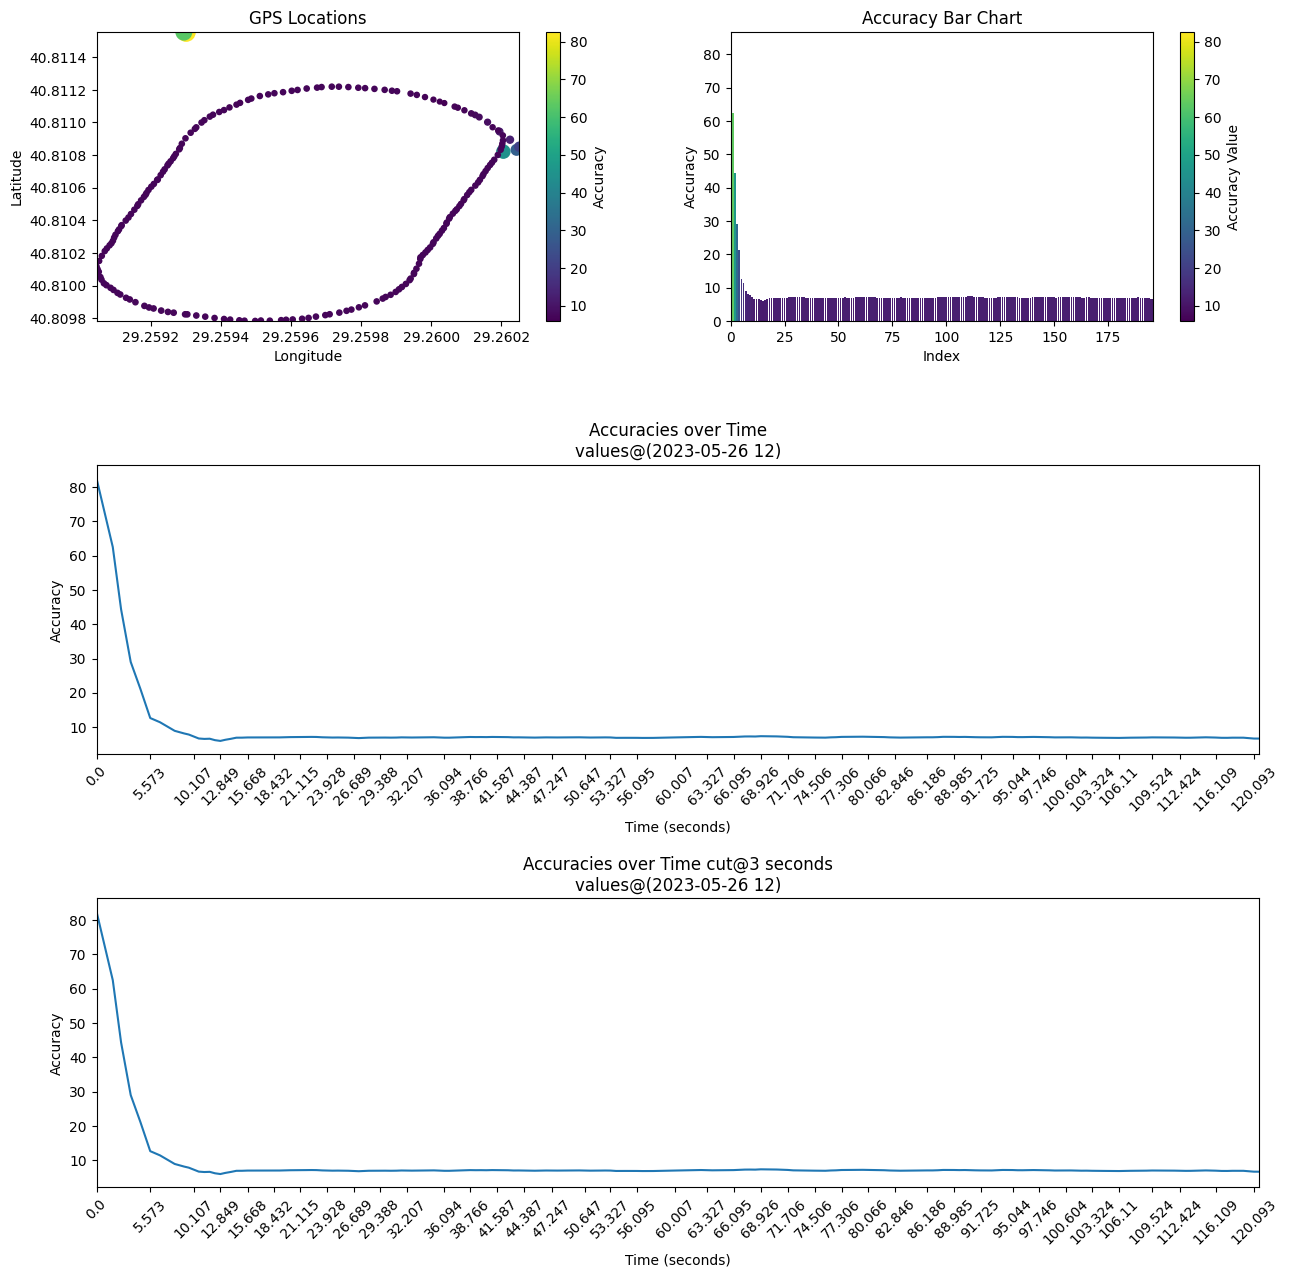

In [6]:
file_id = 2
file_path = found_file_paths[file_id]

figsize=(15, 15)
stride=5
threshold=3
hspace=0.5
all_data = plot_data(file_path, figsize, stride, threshold, hspace)

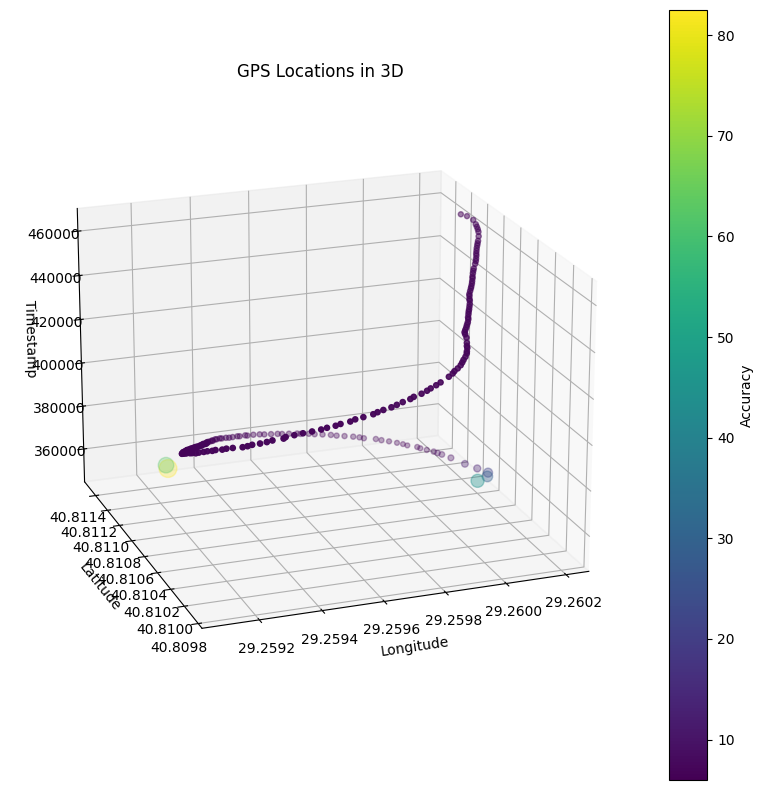

In [7]:
plot_data_3D(file_path, (10,10), elev=20, azim=-110)

In [8]:
all_data[0]

{'timestamp': 1685093347024,
 'mocked': False,
 'coords': {'altitude': 41.20000076293945,
  'heading': 0,
  'altitudeAccuracy': 11.030476570129395,
  'latitude': 40.8115533,
  'speed': 0,
  'longitude': 29.2593009,
  'accuracy': 82.5}}

In [9]:
import math
from datetime import datetime
from geo_funcs import calc_geodesic, calc_dif_geo, deg_dms,calc_pace_from_kmh

In [10]:
# Example usage
f = 10
t = 13
#
#Point 1: 50° 03′ 58.76″N, 005° 42′ 53.10″W
#Point 2: 58° 38′ 38.48″N, 003° 04′ 12.34″W
#P1 : 'latitude': 50.066322,'longitude': -5.71475,
#P2 : 'latitude': 58.644022,'longitude': -3.070094,
#Distance:969954.114 m
#Initial bearing:009° 08′ 30.70″ --9.141863:9 degrees, 8 minutes, 30.7068 seconds 
#Final bearing:	011° 17′ 49.92″ --11.29720:11 degrees, 17 minutes, 49.92 seconds

datapoint1 = {
    'timestamp': all_data[f]['timestamp'],
    'mocked': False,
    'coords': {
        'altitude': 43.30000305175781,
        'heading': 55.56864547729492,
        'altitudeAccuracy': 1.4849402904510498,
        'latitude': all_data[f]['coords']['latitude'],#50.066322,
        'speed': 0.21526417136192322,
        'longitude': all_data[f]['coords']['longitude'],#-5.71475,
        'accuracy': 14.954999923706055
    }
}

datapoint2 = {
    'timestamp': all_data[t]['timestamp'],
    'mocked': False,
    'coords': {
        'altitude': 45.30000305175781,
        'heading': 60.56864547729492,
        'altitudeAccuracy': 1.4849402904510498,
        'latitude': all_data[t]['coords']['latitude'],#58.644022,
        'speed': 0.21526417136192322,
        'longitude': all_data[t]['coords']['longitude'],#-3.070094,
        'accuracy': 14.954999923706055
    }
}

In [11]:
geodesic_results = calc_geodesic(datapoint1, datapoint2)
for s in geodesic_results:
    print(f"{s:10}={geodesic_results[s]}") 

s_geo_len =6.127171349665847
α1        =-40.74754463705637
α2        =-40.74757561336688
pace      =4.458283457040322
kmh       =13.458094483707779


In [12]:
latitude, longitude, final_bearing = calc_dif_geo(datapoint1, geodesic_results)
print(f"Latitude: {math.degrees(latitude)} degrees")
print(f"Longitude: {math.degrees(longitude)} degrees")
print(f"Final Bearing: {math.degrees(final_bearing)} degrees")

Latitude: 40.811000564493476 degrees
Longitude: 29.260107744673128 degrees
Final Bearing: -10007.414786621779 degrees


In [13]:
geodesic_results = calc_geodesic(all_data[f], all_data[t])
for s in geodesic_results:
    print(f"{s:10}={geodesic_results[s]}") 

s_geo_len =6.127171349665847
α1        =-40.74754463705637
α2        =-40.74757561336688
pace      =4.458283457040322
kmh       =13.458094483707779


In [14]:
pace_x = []
lapse = 1
for t in range(len(all_data)-(lapse+1)):
    pace_x.append(calc_geodesic(all_data[t], all_data[t+lapse])["pace"])

print(f"min pace: {min(pace_x)}, mean pace: {sum(pace_x)/len(pace_x)}, max pace: {max(pace_x)}")

min pace: 0.12846314444434065, mean pace: 5.395524546666422, max pace: 51.0698076258035


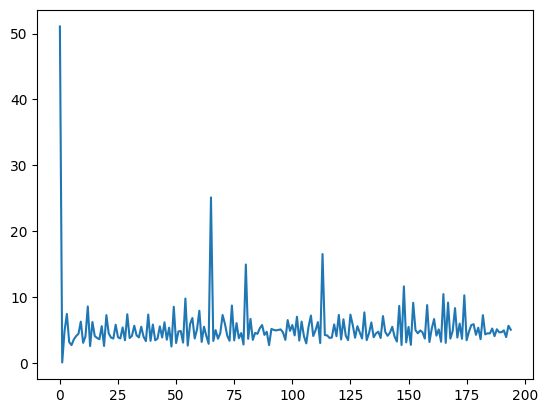

In [15]:
from matplotlib import pyplot as plt
plt.plot(pace_x)
plt.show()

In [16]:
from run_calculations import calculate_distances_speeds, plot_dataframe_heat_map
distances_df, speeds_df = calculate_distances_speeds(all_data, threshold=10)

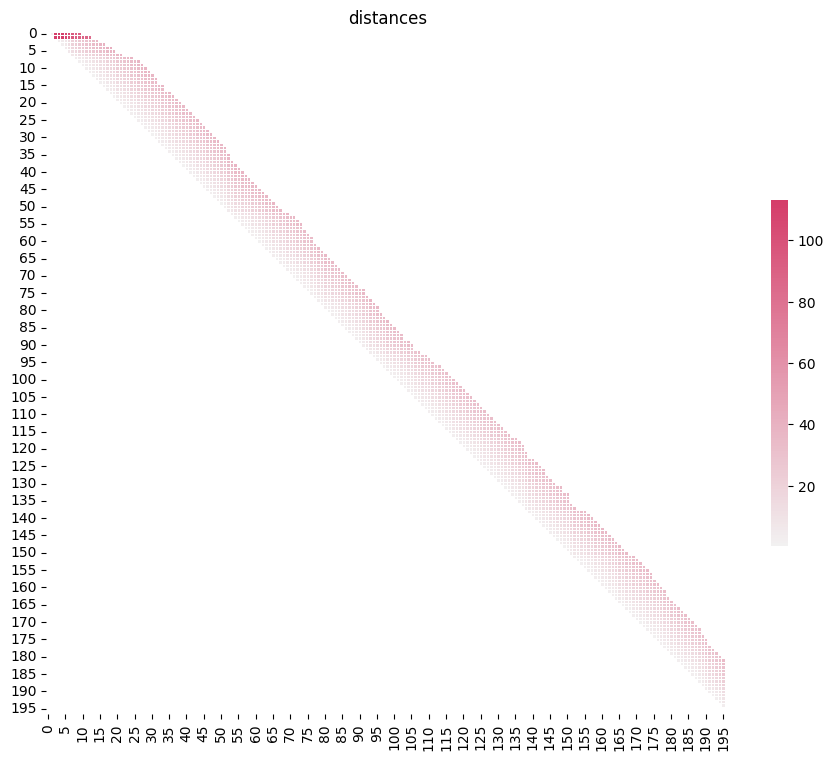

In [17]:
plot_dataframe_heat_map(speeds_df, figure_size=(12,12), title="speeds")

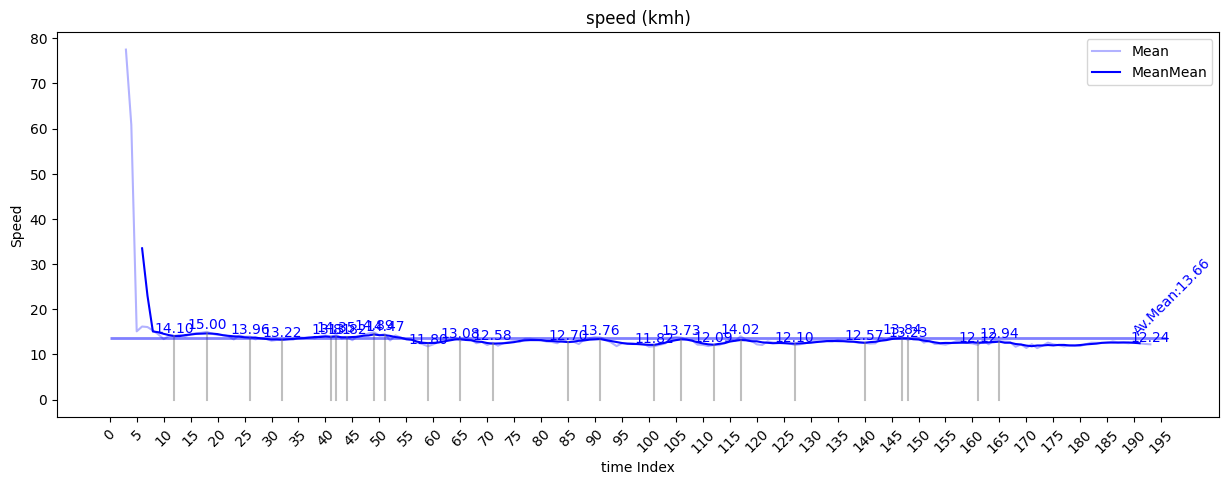

In [18]:
from run_calculations import plot_block_stats
plot_block_stats(speeds_df, W=6, figure_size=(15, 5), mean_change_treshold={"var":{"min":0.2,"max":0.3},"mean":{"min":0.5, "max":3}}, 
                 titlestr="speed (kmh)", verbose=False)